In [174]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [2]:
my_data = np.genfromtxt('dataset/mat_csv.csv', delimiter=',')
my_data.shape

(48, 264)

In [106]:
np.linspace(1, 2.6, 17)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6])

In [107]:
##### Find the best exponentiation value
clusters_num = [i for i in range(10, 50)]
fpcs_vals = {}
m_vals = np.linspace(1, 2.6, 17)
for cluster in clusters_num:
    fpcs_val = []
    for m_val in m_vals:
        cntr, u, u_0, d, jm, p, fpc = fuzz.cmeans(my_data, cluster, m_val, error = 0.0001, maxiter = 10000)
        #fpcs.append(fpc)
        fpcs_val.append(fpc)
    fpcs_vals[cluster] = fpcs_val
    if(cluster % 3 == 0):
        print(cluster)

12
15
18
21
24
27
30
33
36
39
42
45
48


In [666]:
##### Find the best m val
for i in range(1, 17):
    max_val_cnt = 0
    for j in range(10, 50):
        max_val_cnt += 1 if fpcs_vals[j][i] > 0.95 else 0
        #max_val_cnt += sum(np.where(fpcs_vals[:][i] > 0.9, 1, 0))
    print("* " + str(i) + " " + str(max_val_cnt))

* 1 39
* 2 0
* 3 0
* 4 0
* 5 0
* 6 0
* 7 0
* 8 0
* 9 0
* 10 0
* 11 0
* 12 0
* 13 0
* 14 0
* 15 0
* 16 0


In [671]:
fpcs_final = []
for cluster in clusters_num:
    cntr, u, u_0, d, jm, p, fpc = fuzz.cmeans(my_data, cluster, 1.1, error = 0.0001, maxiter = 10000)
    fpcs_final.append(fpc)

In [673]:
len(fpcs_final)

40

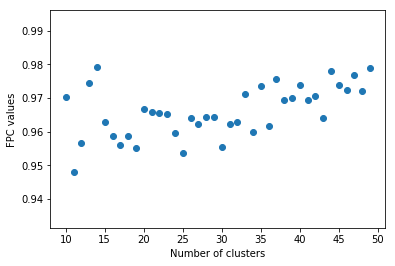

In [679]:
plt.figure()
x = [i for i in range(10, 50)]
y = []
for i in range(40):
    y.append(fpcs_final[i])
plt.scatter(x, y)
plt.xlabel('Number of clusters')
plt.ylabel('FPC values')
#plt.title('Fuzzy Partition Coefficient values for different cluster numbers')
plt.show()

In [676]:
np.argmax(np.asarray(fpcs_final))

4

In [680]:
max(fpcs_final)

0.9793190063625528

In [651]:
fpcs_vals[14]

[1.0,
 0.9764180036508494,
 0.8777696375512017,
 0.8019794133575253,
 0.7001293593010971,
 0.5338894866362405,
 0.4927716041058199,
 0.4055824015164029,
 0.3528000576196446,
 0.3137709446599264,
 0.2743894082820673,
 0.2582300015885808,
 0.23773676085047118,
 0.22068431007121014,
 0.2125280494764404,
 0.2041324804062378,
 0.20030211814949794]

In [127]:
np.linspace(0.5, 1.6, 12)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6])

In [130]:
m_vals = np.linspace(0.5, 1.6, 12)
fpc_val1 = []
for m_val in m_vals:
    cntr, u, u_0, d, jm, p, fpc = fuzz.cmeans(my_data, 15, m_val, error = 0.0001, maxiter = 10000)
    #fpcs.append(fpc)
    fpc_val1.append(fpc)

In [131]:
fpc_val1

[0.0941825632594516,
 0.11483446292928791,
 0.1357391441508072,
 0.16002462087395383,
 0.22219400641746298,
 0.96875,
 0.9587923143277294,
 0.9173384639086127,
 0.782660292191768,
 0.7068804498292915,
 0.5741244066536922,
 0.4647551879290406]

In [132]:
m_vals = np.linspace(0.5, 1.6, 12)
fpc_val1 = []
for m_val in m_vals:
    cntr, u, u_0, d, jm, p, fpc = fuzz.cmeans(my_data, 14, m_val, error = 0.0001, maxiter = 10000)
    #fpcs.append(fpc)
    fpc_val1.append(fpc)

In [133]:
fpc_val1

[0.11128252188634746,
 0.12869200273244782,
 0.1373299948725613,
 0.1407535870795508,
 0.22891772932288978,
 0.9873737373737375,
 0.9575856367986249,
 0.8692811587051104,
 0.7687790318026997,
 0.7274170420245583,
 0.5546448830277014,
 0.4648801400320831]

In [631]:
cnum = 17

In [632]:
cntr, u, u_0, d, jm, p, fpc = fuzz.cmeans(my_data, cnum, 1.1, error = 0.0001, maxiter = 10000)

In [633]:
#take top 3 clusters that each prog belongs to

In [634]:
clust_dict = {}
for i in range(264):
    #top_3 = u[np.argsort(u[:, i])[-5:], i]
    #top_3_arg = np.argsort(u[:, i])[-5:]
    sorted_mem = u[np.argsort(u[:, i])[::-1]][:, i]
    sorted_arg = np.argsort(u[:, i])[::-1]
    #print(top_3)
    for j in range(cnum):
        #print(top_3[j])
        if sorted_mem[j] > 0.7:
            #print(top_3_arg[j])
            if sorted_arg[j] in clust_dict:
                    clust_dict[sorted_arg[j]].append(i)
            else:
                clust_dict[sorted_arg[j]] = [i]

In [635]:
1/cnum

0.058823529411764705

In [636]:
############## Analysis ####################

In [637]:
i = 0
text_file = open("dataset/filenames_1.txt", "r")
lines = [line.rstrip('\n') for line in text_file.readlines()]
text_file.close()

In [638]:
pattern_data = json.load(open('dataset/pattern.json', encoding="utf8"))    

In [639]:
for i in range(len(lines)):
    lines[i] = lines[i].replace("#", "/")

In [640]:
pattern_dict = {}

In [641]:
i = 0
for i in range(264):
    flag = 0
    for j in range(len(pattern_data)):
        for k in range(len(pattern_data[j]['changedFiles'])):
            for key in pattern_data[j]['changedFiles'].keys():
                file_name = key.lstrip()
                file_name = file_name.rstrip()
                if file_name in lines[i]:
                    flag = 1
                    pattern_dict[i] = pattern_data[j]['repairPatterns']
                    #pattern_files.append(file_name)
    if flag == 0:
        print(lines[i])

In [642]:
classification_types = set()
for bug, patterns in pattern_dict.items():
    for pattern in patterns:
        if pattern not in classification_types:
            classification_types.add(pattern)

In [643]:
len(classification_types)

29

In [644]:
categories = ['ChangeDistiller']
category_dict = {}

In [645]:
for cluster_num, bugs in clust_dict.items():
    for bug in bugs:
        if cluster_num in category_dict:
            patterns_before = category_dict[cluster_num]['pattern_count']
            for pattern in pattern_dict[bug]:
                if pattern in classification_types:
                    category_dict[cluster_num]['pattern_count'] += 1
                    if pattern in category_dict[cluster_num]:
                        category_dict[cluster_num][pattern] += 1
                    else:
                        category_dict[cluster_num][pattern] = 1
            if category_dict[cluster_num]['pattern_count'] != patterns_before:
                category_dict[cluster_num]['bug_count'] += 1
        else:
            category_dict[cluster_num] = {}
            category_dict[cluster_num]['pattern_count'] = 0
            patterns_before = category_dict[cluster_num]['pattern_count']
            for pattern in pattern_dict[bug]:
                if pattern in classification_types:
                    category_dict[cluster_num]['pattern_count'] += 1
                    category_dict[cluster_num][pattern] = 1
            if category_dict[cluster_num]['pattern_count'] != patterns_before:
                category_dict[cluster_num]['bug_count'] = 1

In [646]:
cluster_patterns = {}
for cluster_num in category_dict:
    if category_dict[cluster_num]['bug_count'] > 1:
        for pattern in category_dict[cluster_num]:
            if pattern != 'pattern_count' and pattern != 'bug_count':
                tmp = category_dict[cluster_num][pattern] / category_dict[cluster_num]['bug_count']
                #print(tmp)
                if tmp >= 0.5:
                    if pattern in cluster_patterns:
                        if tmp > cluster_patterns[pattern][1]:
                            cluster_patterns[pattern] = (cluster_num,tmp)
                    else:
                        cluster_patterns[pattern] = (cluster_num,tmp)

In [647]:
cluster_patterns

{'singleLine': (0, 0.5595238095238095),
 'condBlockOthersAdd': (13, 0.5),
 'condBlockRetAdd': (3, 1.0),
 'wrongComp': (4, 0.5555555555555556),
 'missComp': (7, 0.5),
 'condBlockExcAdd': (3, 0.5),
 'wrapsIfElse': (3, 0.5),
 'wrapsIf': (3, 0.5),
 'blockRemove': (9, 0.5),
 'condBlockRem': (9, 0.5),
 'expArithMod': (9, 0.5),
 'wrongVarRef': (9, 0.5),
 'expLogicMod': (9, 0.5),
 'initFix': (9, 0.5)}

In [648]:
for pattern in cluster_patterns:
    print('')
    print('\tCluster Number',cluster_patterns[pattern][0],'Pattern',pattern,'Confidence',cluster_patterns[pattern][1])


	Cluster Number 0 Pattern singleLine Confidence 0.5595238095238095

	Cluster Number 13 Pattern condBlockOthersAdd Confidence 0.5

	Cluster Number 3 Pattern condBlockRetAdd Confidence 1.0

	Cluster Number 4 Pattern wrongComp Confidence 0.5555555555555556

	Cluster Number 7 Pattern missComp Confidence 0.5

	Cluster Number 3 Pattern condBlockExcAdd Confidence 0.5

	Cluster Number 3 Pattern wrapsIfElse Confidence 0.5

	Cluster Number 3 Pattern wrapsIf Confidence 0.5

	Cluster Number 9 Pattern blockRemove Confidence 0.5

	Cluster Number 9 Pattern condBlockRem Confidence 0.5

	Cluster Number 9 Pattern expArithMod Confidence 0.5

	Cluster Number 9 Pattern wrongVarRef Confidence 0.5

	Cluster Number 9 Pattern expLogicMod Confidence 0.5

	Cluster Number 9 Pattern initFix Confidence 0.5


In [649]:
cluster_set = set()
for pattern in cluster_patterns:
    #print('')
    #print('\tCluster Number',cluster_patterns[pattern][0]
    cluster_set.add(cluster_patterns[pattern][0])

In [650]:
len(cluster_set)

6

{0: ['condBlockOthersAdd', 'missComp', 'missNullCheckN'],
 1: ['condBlockRetAdd'],
 2: ['expArithMod', 'missComp', 'singleLine'],
 3: ['expLogicExpand', 'singleLine'],
 4: ['expLogicMod', 'wrongComp'],
 5: ['condBlockRetAdd', 'expLogicExpand'],
 6: ['condBlockRetAdd', 'expLogicExpand'],
 7: ['expLogicExpand'],
 8: ['expLogicExpand', 'singleLine'],
 9: ['condBlockOthersAdd', 'copyPaste', 'expLogicMod', 'initFix'],
 10: ['blockRemove', 'condBlockOthersAdd', 'condBlockRem', 'missComp'],
 11: ['condBlockOthersAdd', 'expLogicExpand', 'initFix', 'wrongMethodRef'],
 12: ['condBlockRetAdd', 'expLogicExpand', 'missComp', 'missNullCheckP'],
 13: ['condBlockRetAdd', 'expLogicExpand', 'missComp', 'missNullCheckP'],
 14: ['expArithMod', 'missComp', 'singleLine'],
 15: ['wrapsMethod'],
 16: ['condBlockOthersAdd', 'missComp'],
 17: ['condBlockRetAdd', 'expLogicExpand'],
 18: ['condBlockRetAdd', 'missComp'],
 19: ['expLogicMod', 'singleLine'],
 20: ['expLogicExpand', 'wrapsIfElse', 'wrongMethodRef'],
